<a href="https://colab.research.google.com/github/Raoufmamedov/TELCO_churn/blob/main/%22%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%B8_Uplift_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
# <nbformat>4</nbformat>

# Модель Прогнозирования Оттока Клиентов и Uplift-Моделирование

### 1. Введение

 Данный ноутбук посвящен разработке модели прогнозирования оттока клиентов и базового Uplift-моделирования. Проект охватывает полный цикл от сбора и предобработки данных о клиентах до построения, оценки и демонстрации развертывания модели.

**Бизнес-проблема:** Удержание существующих клиентов зачастую рентабельнее привлечения новых. Прогнозирование оттока направлено на выявление клиентов склонных к принятию решения об уходе и позволяет компаниям применять целевые стратегии удержания.

Uplift-моделирование предсказывает инкрементальное влияние маркетингового вмешательства (например, предложения скидки) на поведение клиента, помогая оптимизировать кампании по повышению лояльности.

**Цель проекта:** построение модели надёжного прогнозирования оттока, которая была бы способна выявлять высокорисковых клиентов, а также изучения эфффекта Uplift-моделирования для персонализированных маркетинговых кампаний.

### Uplift-моделирование: Основы и реализация в ноутбуке

####Uplift-моделирование (также известное как причинно-следственное моделирование воздействия, инкрементальное моделирование или Net Lift modeling) — это продвинутый подход в машинном обучении, который предсказывает приращение (инкремент) вероятности целевого события для каждого отдельного человека в ответ на конкретное маркетинговое или бизнес-вмешательство. Оно предсказывает не вероятность ухода клиента, а эффект который ожидаемо будет иметь от воздействия, сравниваемый с эффектом наблюдаемым в отсутствии воздействия, и его цель идентифицикация клиентов, которые с наибольшей вероятностью положительно отреагируют на наше вмешательство и не отреагировали бы без него.  Её задействование, значительно повышает эффективность маркетинговых кампаний, снижает затраты и предотвращает негативную реакцию.

#### Всего по реакции на воздействие в анализе выделяются Четыре группы клиентов :

#### **Sure Things**: Лояльные м не требующие воздейстыия,
#### **Do-Not-Disturbs**: негативно реагирующие на воздействия, которые стимулируют их уйти,
####**Lost Causes**: Клиенты, потерянные для компании, их не удержать никакими примелемыми для компании методами,
####**Persuadables**: Клиенты, которые останутся только если мы на них повлияем (группа с наибольшим "uplift", инкрементальным эффектомом).Именно эта группа и есть наша целевая аудитория для основных маркетинговых усилий.

### Ценность для бизнеса:
#### - **Оптимизация маркетинговых бюджетов**: Ресурсы тратятся только на реагирующих.
####- **Повышение показателя возврата инвестиций в кампании (ROI)**: Максимальная отдача от каждого вложенного доллара.
####- **Предотвращение "каннибализации" (cannibalization)**: Избегается неоправданное предоставление скидок или бонусов клиентам, которые в любом случае не планировали уходить.
####- **Снижение негативной реакции**: Клиентов, которые не хотят вмешательства, не подвергаются воздействию.
####- **Персонализация**: Возможность создавать более эффективные, персонализированные предложения.###

#### В данном пректе Uplift-моделирование реализовано имитацией данных, чтобы продемонстрировать саму концепцию (uplift и  A/B/C-тестирование)

### Шаги в ноутбуке:
#### 1) Имитация признаков клиентов: Создаются случайные числовые признаки, такие как age, income, loyalty_score, prior_purchases.
#### 2) Имитация групп воздействия (treatment_group) реального A/B/C-теста: Клиенты случайно распределяются по трем группам:

**0: Control (контрольная группа)**: не получают никакого вмешательства.

**1: Treatment_A (воздействие A)**: получают один вид вмешательства.

**2: Treatment_B (воздействие B)**: получают другой тип стимулирования.

#### 3) Имитация исхода (outcome) с эффектом uplift: Мы искусственно вводим "причинно-следственный" эффект, чтобы показать, как uplift проявляется в данных: Базовый уровень для контрольной группы: Определяется базовая вероятность "успешного исхода" (например, клиент остается) для контрольной группы. Инкрементальный эффект для групп воздействия: Мы моделируем, что у Treatment_A больший положительный эффект для клиентов с высокой оценкой loyalty_score, а воздействие Treatment_B нацелено на клиентов с низким income. Это создает группы "убеждаемых" клиентов.

#### 4) Дизайн A/B/C-тестирования для Uplift.
- Гипотеза: Определяется ожидаемый эффект от вмешательства.
- Целевая аудитория: Выбираем группу клиентов для эксперимента.
- Группы: Клиенты делятся на контрольную и одну или несколько групп воздействия. Ключевое отличие: в A/B/C-тесте для uplift-моделирования, группы воздействия могут быть дополнительно сегментированы на основе предсказаний uplift-модели.
- Контрольная группа: Не получает воздействия.
- Случайное воздействие: Получает воздействие без учета uplift-скора.
- Целевое воздействие: Получает воздействие только если uplift-модель предсказывает высокий инкрементальный эффект.
-Разделение трафика: Клиенты распределяются по группам случайным образом (например, по customer_id), чтобы обеспечить статистическую значимость.
Метрики: Измеряются первичные (удержание, ROI) и вторичные метрики.
Длительность: Определяется время проведения эксперимента.

####5). Анализ результатов A/B/C-теста (Концепция в ноутбуке)
После имитации данных, посмотрим, как можно было бы агрегировать метрики по группам и проводить статистические тесты (например, Z-тест для пропорций).
Мы группируем симулированные данные по assigned_experiment_group и рассчитываем "conversion_rate" (долю успешных исходов). Затем продемонстрируем, как можно сравнить конверсию в группе "Целевого воздействия" с "Контрольной группой", чтобы увидеть, есть ли статистически значимое улучшение.

Uplift-моделирование является следующим логическим шагом после прогнозирования оттока, позволяя не только знать, кто уйдет, но и на кого стоит воздействовать и как, чтобы предотвратить отток наиболее эффективно.


In [ ]:
# Установка и импорт библиотек
!pip install causalml optuna mlflow
!pip install xgboost==1.7.6
!pip install fastapi==0.111.0
!pip install uvicorn==0.30.1
!pip install python-multipart==0.0.9
!pip install pandas==2.2.2
!pip install numpy==1.26.4
!pip install scikit-learn==1.6.1
!pip install joblib==1.4.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix, recall_score
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

## 3. Сбор данных и первоначальное исследование (EDA)

### В работе мы будем использовать набор реальных данных 'Telco Customer Churn' по оттоку клиентов   прогнозирования оттока и имитировать данные для Uplift-моделирования.

### **Примечание:** В реальном проекте данные были бы получены нами из CRM-систем, систем биллинга, систем управления услугами.

In [ ]:
# Загружаем реальный набор данных 'Telco Customer Churn'
df_churn_pd = pd.read_csv('https://raw.githubusercontent.com/aaasssppp/Customer-Churn-Prediction/main/Telco-Customer-Churn.csv')

display(df_churn_pd.head().T)
print(df_churn_pd.info())
df_churn_pd.nunique()


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df_churn_pd['TotalCharges'] = pd.to_numeric(df_churn_pd['TotalCharges'], errors='coerce')
# Drop rows where 'TotalCharges' became NaN (these are typically new customers with no charges yet)
df_churn_pd.dropna(inplace=True)


In [ ]:
df_churn_pd['Churn'] = df_churn_pd['Churn']=="Yes"
print(df_churn_pd['Churn'].value_counts())
churn_rate_actual = df_churn_pd['Churn'].value_counts()[1] / df_churn_pd.shape[0] * 100
print(f"Доля оттока: {churn_rate_actual:.2f}%")
print(" - Датасет имеет несбалансированное распределение классов оттока (меньшинство).")
print(" - 'TotalCharges' требовал очистки. Некоторые категориальные признаки могут быть высококардинальными.")


Churn
False    5163
True     1869
Name: count, dtype: int64
Доля оттока: 26.58%
 - Датасет имеет несбалансированное распределение классов оттока (меньшинство).
 - 'TotalCharges' требовал очистки. Некоторые категориальные признаки могут быть высококардинальными.


### - Датасет имеет несбалансированное распределение классов оттока (меньшинство)
### ПризнакTotalCharges требовал очистки. Некоторые категориальные признаки могут быть высококардинальными.

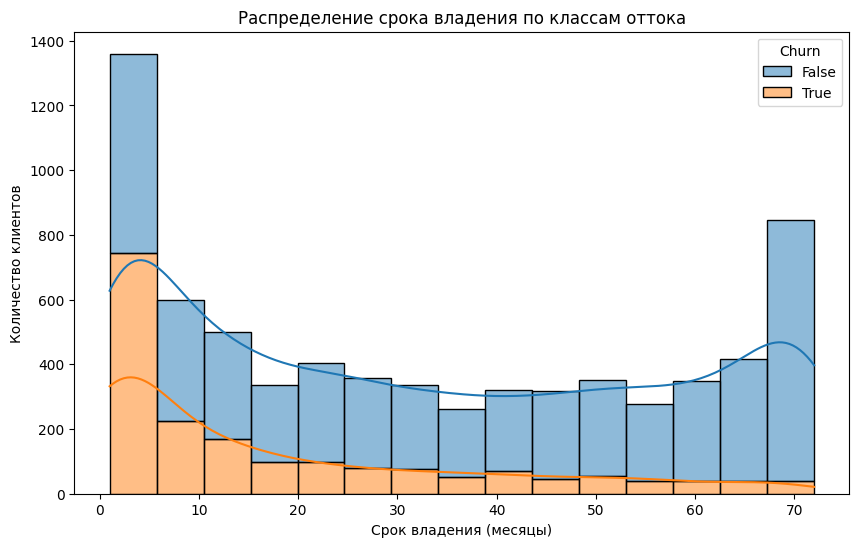

In [ ]:
# EDA: Распределение tenure по классам оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=df_churn_pd, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Распределение срока владения по классам оттока')
plt.xlabel('Срок владения (месяцы)')
plt.ylabel('Количество клиентов')
plt.show()

### Проведём имитацию данных для Uplift-моделирования

In [ ]:
print("\n--- Имитация данных для Uplift-моделирования ---")
np.random.seed(42)
num_uplift_samples = 10000

# Features
age = np.random.randint(18, 70, num_uplift_samples)
income = np.random.normal(50000, 15000, num_uplift_samples)
loyalty_score = np.random.uniform(0, 10, num_uplift_samples)
prior_purchases = np.random.randint(0, 20, num_uplift_samples)

# Treatment groups: 0=Control, 1=Treatment_A, 2=Treatment_B
treatment_group = np.random.choice([0, 1, 2], size=num_uplift_samples, p=[0.4, 0.3, 0.3])

# Outcome (e.g., churn or conversion)
# Simulate uplift effect: Treatment_A increases outcome for some segments, Treatment_B for others
outcome = np.zeros(num_uplift_samples)

# Control group baseline
outcome[(treatment_group == 0) & (loyalty_score > 7)] = np.random.binomial(1, 0.2, sum((treatment_group == 0) & (loyalty_score > 7)))
outcome[(treatment_group == 0) & (loyalty_score <= 7)] = np.random.binomial(1, 0.1, sum((treatment_group == 0) & (loyalty_score <= 7)))

# Treatment_A (e.g., strong effect for high loyalty)
outcome[(treatment_group == 1) & (loyalty_score > 7)] = np.random.binomial(1, 0.4, sum((treatment_group == 1) & (loyalty_score > 7)))
outcome[(treatment_group == 1) & (loyalty_score <= 7)] = np.random.binomial(1, 0.12, sum((treatment_group == 1) & (loyalty_score <= 7)))

# Treatment_B (e.g., strong effect for low income)
outcome[(treatment_group == 2) & (income < 40000)] = np.random.binomial(1, 0.35, sum((treatment_group == 2) & (income < 40000)))
outcome[(treatment_group == 2) & (income >= 40000)] = np.random.binomial(1, 0.11, sum((treatment_group == 2) & (income >= 40000)))


df_uplift_pd = pd.DataFrame({
    'age': age,
    'income': income,
    'loyalty_score': loyalty_score,
    'prior_purchases': prior_purchases,
    'treatment_group': treatment_group,
    'outcome': outcome
})

print("\nПервые 5 строк имитированного датасета Uplift:")
print(df_uplift_pd.head())

print("\nРаспределение групп воздействия:")
print(df_uplift_pd['treatment_group'].value_counts(normalize=True).sort_index())

print("\nРаспределение исхода:")
print(df_uplift_pd['outcome'].value_counts(normalize=True))

print("Вывод по EDA Uplift: Имитированные данные готовы для демонстрации uplift-моделирования.")




--- Имитация данных для Uplift-моделирования ---

Первые 5 строк имитированного датасета Uplift:
   age        income  loyalty_score  prior_purchases  treatment_group  outcome
0   56  37214.198509       6.469394               15                0      0.0
1   69  57130.484160       8.696170                5                2      1.0
2   46  59486.813250       7.758971               19                2      0.0
3   32  42887.327373       6.300938               14                2      0.0
4   60  38423.420639       9.822594               12                0      0.0

Распределение групп воздействия:
treatment_group
0    0.3980
1    0.3001
2    0.3019
Name: proportion, dtype: float64

Распределение исхода:
outcome
0.0    0.8338
1.0    0.1662
Name: proportion, dtype: float64
Вывод по EDA Uplift: Имитированные данные готовы для демонстрации uplift-моделирования.


### Сгенерируем и предобработаем признаки. На этом этапе готовим данные для моделирования прогнозирования оттока, наша задача создать значимые признаки, отражающих поведение клиентов, демографические особенности и клиентский опыт использования услуг.

### Список наших задач:

#### - **Создание новых признаков:** Например, возраст клиента (если доступен), средние расходы на гигабайт (если доступны данные об использовании).
#### - **Кодирование категориальных признаков:** `OneHotEncoder`.
#### - **Масштабирование числовых признаков:** `StandardScaler`.
#### - **Разделение на обучающую и тестовую выборки.**: 'train_test_split'

In [ ]:
# Начинаем предварительную обработку данных об оттоке
df_churn_pd_processed = df_churn_pd.copy()

X_churn = df_churn_pd_processed.drop(columns=['customerID', 'Churn'])
y_churn = df_churn_pd_processed['Churn']

# Группировка признаков по типу и создание пайплайнов предобработки для каждого типа:
categorical_features_churn = X_churn.select_dtypes(include=['object']).columns
numerical_features_churn = X_churn.select_dtypes(exclude=['object']).columns
numerical_transformer_churn = StandardScaler()
categorical_transformer_churn = OneHotEncoder(drop='first')

# Трансформер столбцов
preprocessor_churn = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_churn, numerical_features_churn),
        ('cat', categorical_transformer_churn, categorical_features_churn)
    ])

# Разбиение на тренировочный и тестовый наборы данных и преобразование
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.25, random_state=42, stratify=y_churn)

X_train_churn_processed = preprocessor_churn.fit_transform(X_train_churn)
X_test_churn_processed = preprocessor_churn.transform(X_test_churn)

# Для удобства превращаем в датафрейм
feature_names = list(numerical_features_churn) + \
                list(preprocessor_churn.named_transformers_['cat'].get_feature_names_out(categorical_features_churn))
display(feature_names)
X_train_churn_processed = pd.DataFrame(X_train_churn_processed, columns=feature_names)
X_test_churn_processed = pd.DataFrame(X_test_churn_processed, columns=feature_names)

print("Предварительная обработка данных об оттоке завершена.")
print(f"Размер X_train_churn_processed: {X_train_churn_processed.shape}")
print(f"Размер X_test_churn_processed: {X_test_churn_processed.shape}")
print("Образец обработанных данных (первые 5 строк X_train_churn_processed):")
print(X_train_churn_processed.head(10))


['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

Предварительная обработка данных об оттоке завершена.
Размер X_train_churn_processed: (5274, 30)
Размер X_test_churn_processed: (1758, 30)
Образец обработанных данных (первые 5 строк X_train_churn_processed):
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0      -0.440481 -0.550434        1.162877     -0.179659          1.0   
1      -0.440481 -1.283779       -0.305269     -0.984606          1.0   
2      -0.440481  0.671808        0.321096      0.624738          1.0   
3      -0.440481  0.427360        0.713817      0.560688          0.0   
4      -0.440481 -1.283779       -0.638336     -0.989019          1.0   
5      -0.440481  0.753291       -1.493374     -0.571253          0.0   
6      -0.440481 -0.387468        0.289612     -0.287647          0.0   
7       2.270248 -0.550434       -1.014487     -0.755609          1.0   
8       2.270248 -0.428210       -0.823926     -0.622524          1.0   
9      -0.440481 -0.061537        0.495086      0.046724     

### Сохраняем препроцессор и имена признаков для предсказаний (в формате API приложения)

In [ ]:
joblib.dump(preprocessor_churn, "/tmp/preprocessor_churn.joblib")
joblib.dump(feature_names, "/tmp/churn_feature_names.joblib")

['/tmp/churn_feature_names.joblib']

## 2. Выбор типа модели прогнозирования оттока, её построение

### Учитывая небольшие размеры датасета и необходимость решения задачи бинарной классификации, нам удобно использовать классификатор XGBoost Classifier отличающийся высокой производительностью и гибкостью.

 ### Учитывая имеющийся дисбаланс классов целевой переменной, нам необходимо добавить в конфигурацию классификатора параметр scale_pos_weight, учитывающий более редкие наблюдения оттока и позволяющую увеличить вес этих образцов.

In [ ]:
classes=y_train_churn.value_counts()
(classes[0]/classes[1]).round(2)

2.76

#### Определяем целевую функцию для Optuna, поскольку дисбаланс не такой сильный, выбираем ROC-AUC

In [ ]:
# Определяем целевую функцию для Optuna
def objective(trial):
    """
    Целевая функция для Optuna
    :param trial: Объект Trial для оптимизации
    :return: Значение метрики для оптимизации
    """
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'random_state': 42,
        'n_jobs': -1,
        'n_estimators': trial.suggest_int('n_estimators', 2000, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.09, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 6, 16),
        'subsample': trial.suggest_float('subsample', 0.45, 0.6),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.59, 0.62),
        'min_child_weight': trial.suggest_int('min_child_weight', 9, 18),
        'gamma': trial.suggest_float('gamma', 0.08, 0.095),
        'reg_alpha': trial.suggest_float('reg_alpha', 20, 33, log=False),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 0.002, log=True),
    }

    model = XGBClassifier(**params)

    # Обучаем модель без ранней остановки, так как это вызывает проблемы совместимости
    model.fit(X_train_churn_processed, y_train_churn,
              eval_set=[(X_test_churn_processed, y_test_churn)],
              verbose=False)

    # Получаем предсказанные вероятности для положительного класса
    y_pred_proba = model.predict_proba(X_test_churn_processed)[:, 1]

    # Возвращаем метрику для оптимизации
    return roc_auc_score(y_test_churn, y_pred_proba)


In [ ]:

# Создаем исследование Optuna и запускаем оптимизацию
print("\nНачинаем настройку гиперпараметров с Optuna...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2025-07-03 15:16:52,157] A new study created in memory with name: no-name-e2e9e05e-dcd8-48c3-9e18-2a4435bb4ce0



Начинаем настройку гиперпараметров с Optuna...


[I 2025-07-03 15:17:00,270] Trial 0 finished with value: 0.8474789226020365 and parameters: {'n_estimators': 2292, 'learning_rate': 0.09129379650394324, 'max_depth': 9, 'subsample': 0.4853266862331413, 'colsample_bytree': 0.6096804065305184, 'min_child_weight': 18, 'gamma': 0.08142997408087276, 'reg_alpha': 31.274967169055575, 'reg_lambda': 1.1664942928504319e-05}. Best is trial 0 with value: 0.8474789226020365.
[I 2025-07-03 15:17:06,638] Trial 1 finished with value: 0.8475228770420156 and parameters: {'n_estimators': 2243, 'learning_rate': 0.09007865200644492, 'max_depth': 7, 'subsample': 0.4519280484049507, 'colsample_bytree': 0.6138928778535208, 'min_child_weight': 17, 'gamma': 0.09145289548392596, 'reg_alpha': 26.314317155062824, 'reg_lambda': 0.00045824855331683345}. Best is trial 1 with value: 0.8475228770420156.
[I 2025-07-03 15:17:14,892] Trial 2 finished with value: 0.8475245357001279 and parameters: {'n_estimators': 2080, 'learning_rate': 0.09283936908853085, 'max_depth': 6,

In [ ]:

print("\nНастройка гиперпараметров с Optuna завершена.")
print(f"Лучшая итерация: {study.best_trial.number}")
print(f"Лучший AUC на тестовой выборке: {study.best_value:.4f}")
print("Лучшие гиперпараметры:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")



Настройка гиперпараметров с Optuna завершена.
Лучшая итерация: 81
Лучший AUC на тестовой выборке: 0.8491
Лучшие гиперпараметры:
  n_estimators: 2383
  learning_rate: 0.0994997169487844
  max_depth: 6
  subsample: 0.49724594284396345
  colsample_bytree: 0.5958355265237725
  min_child_weight: 14
  gamma: 0.0876015403793251
  reg_alpha: 27.43240791725854
  reg_lambda: 3.843083036000798e-05


Мы получили хорошее значение метрики ROC_AUC

In [ ]:

# Обучаем финальную модель с лучшими гиперпараметрами
print("\nОбучаем финальную модель XGBoost с лучшими гиперпараметрами...")
best_churn_params = study.best_params
final_xgb_churn_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    # use_label_encoder=True,
    random_state=42,
    n_jobs=-1,
    **best_churn_params # Применяем лучшие параметры от Optuna
)

final_xgb_churn_model.fit(X_train_churn_processed, y_train_churn,
                          eval_set=[(X_test_churn_processed, y_test_churn)],
                          verbose=False )

# Save the trained model
joblib.dump(final_xgb_churn_model, "/tmp/xgb_churn_model.joblib")
print("Модель XGBoost для оттока сохранена.")


Обучаем финальную модель XGBoost с лучшими гиперпараметрами...
Модель XGBoost для оттока сохранена.


In [ ]:

print("Лучшие параметры:", study.best_params)

Лучшие параметры: {'n_estimators': 2383, 'learning_rate': 0.0994997169487844, 'max_depth': 6, 'subsample': 0.49724594284396345, 'colsample_bytree': 0.5958355265237725, 'min_child_weight': 14, 'gamma': 0.0876015403793251, 'reg_alpha': 27.43240791725854, 'reg_lambda': 3.843083036000798e-05}


ЩС

In [ ]:
# prompt:  графики Optuna

# Визуализация результатов Optuna
print("Генерация графиков Optuna...")

# График истории оптимизации
optuna.visualization.plot_optimization_history(study).show()

# График параллельных координат
optuna.visualization.plot_parallel_coordinate(study).show()

# График значимости гиперпараметров
optuna.visualization.plot_param_importances(study).show()

print("Генерация графиков Optuna завершена.")

Генерация графиков Optuna...


Генерация графиков Optuna завершена.


In [ ]:
# prompt: optuna surface plot

optuna.visualization.plot_slice(study).show()

In [ ]:
# Save the trained model
joblib.dump(final_xgb_churn_model, "/tmp/xgb_churn_model.joblib")


['/tmp/xgb_churn_model.joblib']

ЗАДЕЛ НА БУДУЩЕЕ: сопряжение с MLFlow.

Конфигурирование MLFlow выходит за рамки этого проекта, поэтому пока ставим заглушку.




ROC-AUC на тестовой выборке: 0.8489

Матрица ошибок на тестовой выборке:
[[1123  168]
 [ 168  299]]


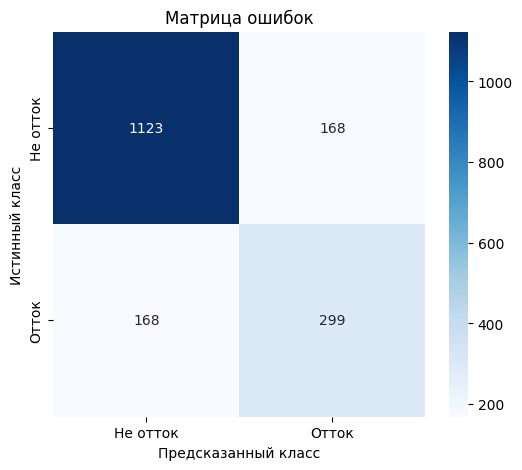


Отчет о классификации на тестовой выборке:
              precision    recall  f1-score   support

    Не отток       0.87      0.87      0.87      1291
       Отток       0.64      0.64      0.64       467

    accuracy                           0.81      1758
   macro avg       0.76      0.76      0.76      1758
weighted avg       0.81      0.81      0.81      1758



In [ ]:
y_pred_churn_proba = final_xgb_churn_model.predict_proba(X_test_churn_processed)[:, 1]
y_pred_churn = (y_pred_churn_proba > 0.43).astype(int) # Default threshold

# ROC-AUC Score
roc_auc_churn = roc_auc_score(y_test_churn, y_pred_churn_proba)
print(f"\nROC-AUC на тестовой выборке: {roc_auc_churn:.4f}")

# Confusion Matrix
cm_churn = confusion_matrix(y_test_churn, y_pred_churn)
print("\nМатрица ошибок на тестовой выборке:")
print(cm_churn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_churn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не отток', 'Отток'],
            yticklabels=['Не отток', 'Отток'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# Classification Report
report_churn = classification_report(y_test_churn, y_pred_churn, target_names=['Не отток', 'Отток'])
print("\nОтчет о классификации на тестовой выборке:")
print(report_churn)


In [ ]:
import mlflow
import mlflow.sklearn
with mlflow.start_run(run_name="ChurnPrediction_XGBoost"):
    mlflow.log_param("classifier_model", "XGBoost")
    mlflow.log_param("n_estimators", final_xgb_churn_model.n_estimators)
    mlflow.log_param("learning_rate", final_xgb_churn_model.learning_rate)
    # mlflow.log_param("scale_pos_weight", scale_pos_weight_value) # Логируем новый параметр
    # # # Note: best_iteration is only available if early stopping actually occurred and model was saved.
    # If not, xgb_churn_model.best_iteration might not be set.
    if hasattr(final_xgb_churn_model, 'best_iteration'):
        mlflow.log_metric("best_iteration", final_xgb_churn_model.best_iteration)

    mlflow.sklearn.log_model(
        sk_model=final_xgb_churn_model,
        artifact_path="xgb_churn_model"
    )
    print("Модель XGBoost для оттока зарегистрирована в MLflow (локально).")


2025/07/03 13:55:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/03 13:55:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Модель XGBoost для оттока зарегистрирована в MLflow (локально).


### 6. Оценка и Интерпретация Модели

#### Оценка моделей прогнозирования оттока (бинарная классификация) требует особого внимания к метрикам Precision, Recall, F1-score, ROC-AUC.

### **Бизнес-контекст ошибок:**
#### -   **Ложноположительный результат (FP):** Клиент, который не собирался уходить, ошибочно помечен как "риск оттока". Приводит к ненужным маркетинговым усилиям и потенциальному раздражению клиента.
#### -   **Ложноотрицательный результат (FN):** Клиент, который действительно собирался уйти, ошибочно помечен как "не риск оттока". Приводит к упущенным возможностям удержания и потере клиента.
#### В прогнозировании оттока **ущерб от FN часто выше ущерба от FP**, поэтому более высокий Recall для класса "отток" предпочтителен.



Интерпретация результатов:"
 - Высокий ROC-AUC указывает на хорошую общую способность модели различать клиентов, которые уйдут, и тех, кто останется.
 - Достаточно высокий Recall для 'Отток' означает, что мы выявляем многих клиентов, которые на самом деле уйдут.
 - Матрица ошибок дает конкретное количество ложноположительных и ложноотрицательных результатов, позволяя оценить бизнес-влияние этих ошибок.
 - Выбор порога классификации (по умолчанию 0.5) может быть скорректирован для балансировки компромиссов между FP и FN в соответствии с бизнес-стратегией (например, максимизировать Recall, если стоимость упущенного клиента очень высока).

In [ ]:
# ## 8. Соображения MLOps
#
# Внедрение ML-моделей в производство требует надежных практик MLOps.
#
# ### Отслеживание экспериментов и Реестр моделей (MLflow)
# `MLflow` позволяет отслеживать параметры, метрики и артефакты каждого запуска эксперимента.
# `MLflow Model Registry` предоставляет централизованное хранилище для управления версиями моделей,
# их жизненным циклом (staging, production) и аннотациями.
#
# **Концепция:**
# ```python
# # Пример логирования в MLflow (как показано в шаге 5)
import mlflow
import mlflow.sklearn
with mlflow.start_run(run_name="ChurnPrediction_XGBoost_Local"):
    # ... обучение модели ...
    mlflow.log_param("n_estimators", final_xgb_churn_model.n_estimators)
    mlflow.log_metric("roc_auc", roc_auc_churn)
    mlflow.sklearn.log_model(
        sk_model=final_xgb_churn_model,
        artifact_path="xgb_churn_model",
        registered_model_name="XGBoostChurnPredictor"
    )

2025/07/03 13:55:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/03 13:55:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoostChurnPredictor'.
Created version '1' of model 'XGBoostChurnPredictor'.



## Мониторинг модели
### После развертывания модели критически важен мониторинг ее производительности и дрейфа.

## **Ключевые метрики для мониторинга:**
###-   **Метрики производительности модели:** ROC-AUC, Precision, Recall, F1-score на актуальных данных.
### -   **Дрейф данных (Data Drift):** Изменение распределения входных признаков (например, демографии клиентов, паттернов использования сервисов). Может указывать на изменение клиентской базы или продукта.
### -   **Дрейф модели (Model Drift):** Деградация предсказательной способности модели со временем по сравнению с целевой переменной.
### -   **Бизнес-метрики:** Фактический процент оттока, ROI маркетинговых кампаний, стоимость удержания.
### -   **Инфраструктурные метрики:** Задержка инференса, пропускная способность API, использование ресурсов (CPU/RAM).


In [ ]:
from scipy.stats import ks_2samp

def detect_data_drift(baseline_data, current_data, feature_name, alpha=0.05):
    """
    Проверяет наличие дрейфа данных для числового признака с использованием теста Колмогорова-Смирнова.
    """
    if feature_name not in baseline_data.columns or feature_name not in current_data.columns:
        print(f"Признак '{feature_name}' не найден в одном из датасетов.")
        return False

    stat, p_value = ks_2samp(baseline_data[feature_name], current_data[feature_name])
    if p_value < alpha:
        print(f"Дрейф обнаружен для признака '{feature_name}': p-value = {p_value:.4f}")
        return True
    else:
        print(f"Дрейфа не обнаружено для признака '{feature_name}': p-value = {p_value:.4f}")
        return False

# Пример использования
baseline_data = X_train_churn_processed # Данные, на которых была обучена модель
current_data = X_test_churn_processed # Имитация новых производственных данных

for feature in baseline_data.columns: # Проверяем первые 5 признаков
    detect_data_drift(baseline_data, current_data, feature)

Дрейфа не обнаружено для признака 'SeniorCitizen': p-value = 1.0000
Дрейфа не обнаружено для признака 'tenure': p-value = 0.7379
Дрейфа не обнаружено для признака 'MonthlyCharges': p-value = 0.3504
Дрейфа не обнаружено для признака 'TotalCharges': p-value = 0.8717
Дрейфа не обнаружено для признака 'gender_Male': p-value = 0.8627
Дрейфа не обнаружено для признака 'Partner_Yes': p-value = 0.9998
Дрейфа не обнаружено для признака 'Dependents_Yes': p-value = 1.0000
Дрейфа не обнаружено для признака 'PhoneService_Yes': p-value = 1.0000
Дрейфа не обнаружено для признака 'MultipleLines_No phone service': p-value = 1.0000
Дрейфа не обнаружено для признака 'MultipleLines_Yes': p-value = 1.0000
Дрейфа не обнаружено для признака 'InternetService_Fiber optic': p-value = 1.0000
Дрейфа не обнаружено для признака 'InternetService_No': p-value = 1.0000
Дрейфа не обнаружено для признака 'OnlineSecurity_No internet service': p-value = 1.0000
Дрейфа не обнаружено для признака 'OnlineSecurity_Yes': p-valu

In [ ]:

# ### CI/CD
# `CI/CD (Continuous Integration/Continuous Delivery)` автоматизирует процессы тестирования, сборки и развертывания ML-кода.

# **Ключевые этапы:**
# 1.  **Непрерывная интеграция (CI):** Автоматическое тестирование кода при каждом коммите (модульные тесты, тесты интеграции, тесты качества кода).
# 2.  **Непрерывная доставка (CD):** Автоматическое развертывание проверенного кода в промежуточные или продакшн-среды.
# 3.  **Автоматизированные тесты:**
#     * **Модульные тесты:** Для функций предобработки, генерации признаков.
#     * **Тесты данных:** Проверка ожиданий по качеству данных (например, уникальность ID, отсутствие NULLs в критически важных полях).
#     * **Тесты модели:** Проверка минимальной производительности модели (например, ROC-AUC > X), стабильности предсказаний.

# **Инструменты:** `Jenkins`, `GitLab CI/CD`, `GitHub Actions`, `Azure DevOps`.

# <codecell>

In [ ]:

# 9. Дизайн A/B/C-тестирования для Uplift-моделирования

Uplift-моделирование направлено на идентификацию клиентов, которые будут
**инкрементально** реагировать на вмешательство. A/B/C-тестирование
является основой для оценки таких моделей.

**Цель A/B/C-теста:** Определить оптимальную стратегию маркетингового воздействия,
которая максимизирует целевое поведение (например, удержание клиента) при
минимизации затрат.

### Дизайн эксперимента:

1.  **Гипотеза:** Применение персонализированных предложений, основанных на
    прогнозах uplift-модели, приведет к увеличению удержания клиентов на X%
    по сравнению со случайным таргетингом или отсутствием воздействия.
2.  **Целевая аудитория:** Случайно выбранная группа клиентов, потенциально
    подверженных оттоку.
3.  **Группы:**
    -   **Контрольная группа (A - Control):** Клиенты не получают никакого вмешательства.
    -   **Группа случайного воздействия (B - Random Treatment):** Клиенты получают стандартное предложение.
    -   **Группа целевого воздействия (C - Targeted Treatment):** Клиенты получают предложение,
        определенное uplift-моделью (например, только для тех, у кого высокий predicted uplift).
4.  **Разделение трафика:** Обычно по `customer_id` для обеспечения согласованности.


In [ ]:
# Пример распределения клиентов по группам A/B/C (используем имитированные данные uplift)

# Случайное распределение по группам A (контроль), B (случайное воздействие), C (целевое воздействие)
# Для реального A/B теста это делается на этапе выборки перед началом кампании.
df_uplift_pd['assigned_experiment_group'] = np.random.choice(
    ['A_Control', 'B_Random_Treatment', 'C_Targeted_Treatment'],
    size=len(df_uplift_pd),
    p=[0.33, 0.33, 0.34]
)

print("\nРаспределение клиентов по смоделированным группам A/B/C:")
print(df_uplift_pd['assigned_experiment_group'].value_counts(normalize=True))



Распределение клиентов по смоделированным группам A/B/C:
assigned_experiment_group
C_Targeted_Treatment    0.3490
A_Control               0.3287
B_Random_Treatment      0.3223
Name: proportion, dtype: float64



# 9. Дизайн A/B/C-тестирования для Uplift-моделирования

Uplift-моделирование направлено на идентификацию клиентов, которые будут
**инкрементально** реагировать на вмешательство. A/B/C-тестирование
является основой для оценки таких моделей.

**Цель A/B/C-теста:** Определить оптимальную стратегию маркетингового воздействия,
которая максимизирует целевое поведение (например, удержание клиента) при
минимизации затрат.

### Дизайн эксперимента:

1.  **Гипотеза:** Применение персонализированных предложений, основанных на
    прогнозах uplift-модели, приведет к увеличению удержания клиентов на X%
    по сравнению со случайным таргетингом или отсутствием воздействия.
2.  **Целевая аудитория:** Случайно выбранная группа клиентов, потенциально
    подверженных оттоку.
3.  **Группы:**
    -   **Контрольная группа (A - Control):** Клиенты не получают никакого вмешательства.
    -   **Группа случайного воздействия (B - Random Treatment):** Клиенты получают стандартное предложение.
    -   **Группа целевого воздействия (C - Targeted Treatment):** Клиенты получают предложение,
        определенное uplift-моделью (например, только для тех, у кого высокий predicted uplift).
4.  **Разделение трафика:** Обычно по `customer_id` для обеспечения согласованности.
5.  **Метрики для измерения:**
    -   **Первичные метрики:** Процент удержания клиентов, процент оттока, ROI кампании.
    -   **Вторичные метрики:** Ответ на предложение, пожизненная ценность клиента (LTV).
6.  **Длительность эксперимента:** Зависит от жизненного цикла клиента, периода, необходимого для оттока, и ожидаемого эффекта. Может потребоваться несколько месяцев.

**Расчет размера выборки:**
Расчет размера выборки будет зависеть от выбранных метрик (пропорции оттока/удержания).
Используйте соответствующие статистические формулы для сравнения пропорций (например, Z-тест).

**Анализ результатов:**
После сбора данных из всех групп, используйте Python (Pandas) и статистические тесты (например, `scipy.stats`) для агрегации
метрик и проведения статистических тестов.

In [ ]:
# Пример анализа результатов A/B/C теста (концептуально)
# Предположим, что df_uplift_pd содержит реальные результаты кампании (outcome, treatment_group)

# Агрегация метрик по группам
metrics_df_uplift = df_uplift_pd.groupby('assigned_experiment_group')['outcome'].agg(
    total_customers='count',
    positive_outcomes=lambda x: (x == 1).sum()
).reset_index()

metrics_df_uplift['conversion_rate'] = metrics_df_uplift['positive_outcomes'] / metrics_df_uplift['total_customers']

print("\nАгрегированные метрики по группам A/B/C:")
print(metrics_df_uplift)

# Проведение статистических тестов (например, Z-тест для пропорций)
from statsmodels.stats.proportion import proportions_ztest

# Пример сравнения 'C_Targeted_Treatment' vs 'A_Control'
count_c = metrics_df_uplift[metrics_df_uplift['assigned_experiment_group'] == 'C_Targeted_Treatment']['positive_outcomes'].iloc[0]
nobs_c = metrics_df_uplift[metrics_df_uplift['assigned_experiment_group'] == 'C_Targeted_Treatment']['total_customers'].iloc[0]

count_a = metrics_df_uplift[metrics_df_uplift['assigned_experiment_group'] == 'A_Control']['positive_outcomes'].iloc[0]
nobs_a = metrics_df_uplift[metrics_df_uplift['assigned_experiment_group'] == 'A_Control']['total_customers'].iloc[0]

if nobs_a > 0 and nobs_c > 0:
    stat, pval = proportions_ztest([count_c, count_a], [nobs_c, nobs_a], alternative='larger') # Test if C > A
    print(f"\nZ-тест (C_Targeted_Treatment vs A_Control): Z-статистика = {stat:.4f}, P-значение = {pval:.4f}")
    if pval < 0.05:
        print("Статистически значимое увеличение конверсии в группе C по сравнению с группой A.")
    else:
        print("Статистически значимого увеличения конверсии не обнаружено.")
else:
    print("\nНедостаточно данных для Z-теста в одной из групп.")


Агрегированные метрики по группам A/B/C:
  assigned_experiment_group  total_customers  positive_outcomes  \
0                 A_Control             3287                499   
1        B_Random_Treatment             3223                561   
2      C_Targeted_Treatment             3490                602   

   conversion_rate  
0         0.151810  
1         0.174061  
2         0.172493  

Z-тест (C_Targeted_Treatment vs A_Control): Z-статистика = 2.3069, P-значение = 0.0105
Статистически значимое увеличение конверсии в группе C по сравнению с группой A.


## 10. Заключение и дальнейшие шаги

Этот ноутбук реализует сквозной подход к созданию модели прогнозирования оттока клиентов и основам Uplift-моделирования:
-   **EDA и понимание клиентских данных:** Работа с данными о клиентах и несбалансированностью классов.
-   **Генерация признаков и предварительная обработка:** Создание поведенческих и демографических признаков.
-   **Выбор и обучение моделей:** Использование XGBoost для прогнозирования оттока.
-   **Оценка и интерпретация:** Фокус на метриках Precision, Recall, ROC-AUC и бизнес-последствиях ошибок.
-   **Базовое развертывание:** Развёртывание концепции с помощью FastAPI и Docker для развертывания модели.
-   **MLOps:** Интеграция с MLflow для отслеживания, версионирование данных, Airflow для оркестрации и принципы мониторинга. (заглушка)
-   **A/B/C-тестирование:** Проектирование эксперимента для оценки влияния на удержание клиентов. (имитация данных)

### Дальнейшие шаги и улучшения:

1.  **Продвинутое Uplift-моделирование:** Использование более сложных методов uplift-моделирования
    (например, методы дерева uplift из `causalml`, `Transformed Outcome`, `Causal Forest`) для более точного
    определения оптимальных стратегий воздействия.
2.  **Потоковое прогнозирование оттока:** Реализация системы, которая оценивает риск оттока в реальном времени
    на основе текущего поведения клиента (например, с использованием Kafka и Spark Structured Streaming).
3.  **Интеграция с системами персонализации:** Автоматическая активация персонализированных
    кампаний удержания на основе прогнозов модели.
4.  **Учет стоимости удержания:** Оптимизация кампаний не только по удержанию, но и по
    стоимости удержания каждого клиента, например, с использованием обучения с учетом затрат.
5.  **Динамическая сегментация клиентов:** Использование методов кластеризации для
    динамического создания сегментов клиентов и применения к ним специфических моделей/предложений.
6.  **Моделирование жизненного цикла клиента:** Построение моделей, которые прогнозируют
    не только отток, но и другие важные этапы в жизненном цикле клиента (например, активация, рост, лояльность).
7.  **Интерпретируемость uplift-моделей:** Использование SHAP или LIME для объяснения, почему для определенных клиентов
    прогнозируется высокий uplift, что помогает маркетологам в создании более эффективных предложений.

In [ ]:
!pip install apache-airflow[cncf.kubernetes,docker,google,http,postgres,slack,statsd,virtualenv,ssh]==2.9.3 --constraint "https://raw.githubusercontent.com/apache/airflow/constraints-2.9.3/constraints-no-providers-3.9.txt"

**Note:** Installing `apache-airflow` here will allow the import to succeed, but to actually run an Airflow DAG, you need a full Airflow environment setup. The code in the previous cell is for demonstration purposes only and requires a complete Airflow installation to be functional.